# Text and Cluster Analysis of California Cabernet Sauvigon reviews

<h2> Problem Statement:

We analyze a file consisting of description of California Cabernet Sauvignon by Wine Experts.
The goal of the text analytics is to process the text and generate the TF/IDF matrix from the descriptions.
Then we move ahead and cluster the reviews into 9 clusters and display them.
At the end, we calculate the price of wine in each cluster.


<b>About the Dataset </b>
The Dataset was provided by Prof Edward Jones, Executive Professor, Department of Statistics at Texas A&M University, College Station as a part of Academic work for course STAT 656. 
The Dataset consists of 13135 unique Wine reviews.

<b> Data Dictionary: </b>
1. review: A number unique	for	each	review	(an	ID)
2. description:	The	actual review	(text)
3. year:	 Year	the	wine	was	bottled.		This	is missing for	some	wines.
4. points: The	points	assigned	by	the	reviewer	to	the	wine.		These			
5. range	from	80	to	100.		Better	reviews	have	higher	points.
6. price: The	retail	price	for	a	bottle	of	the	wine ($ 0-$3000).
7. winery: The	winery	where	the	wine	was	bottled.		(a text label)
8. Region: Region	of	California (text) where	wine	was	produced.

In [2]:
from AdvancedAnalytics import TextAnalytics
import pandas as pd
# Classes for Text Preprocessing
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
# sklearn methods for Preparing the Term-Doc Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# sklearn methods for Extracting Topics using the Term-Doc Matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
# Increase column width to let pandy read large text columns
pd.set_option('max_colwidth', 32000)
df = pd.read_excel("CaliforniaCabernet.xlsx")

In [3]:
# Setup program constants and reviews
n_reviews = len(df['description'])
s_words = 'english'
ngram = (1,2)
reviews = df['description']
m_features = None # default is None
n_topics = 9 # number of topics
max_iter = 10 # maximum number of iterations
max_df = 0.5 # max proportion of docs/reviews allowed for a term
learning_offset = 10. # default is 10
learning_method = 'online' # alternative is 'batch' for large files
tf_matrix='tfidf'

1. Creating the Review by Term Frequency Matrix using Custom Analyzer
2. max_df is a limit for terms. If a term has more than this proportion of documents then that term is dropped. Use max_df=1.0 to eliminate this behavior. Typical values are max_df between 0.5 and 0.95


In [4]:
ta = TextAnalytics()
cv = CountVectorizer(max_df=max_df, min_df=2, max_features=m_features,analyzer=ta.my_analyzer)
tf = cv.fit_transform(reviews)
terms = cv.get_feature_names()
print('{:.<22s}{:>6d}'.format("Number of Reviews", len(reviews)))
print('{:.<22s}{:>6d}'.format("Number of Terms", len(terms)))
term_sums = tf.sum(axis=0)
term_counts = []
for i in range(len(terms)):
    term_counts.append([terms[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(10):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))


Number of Reviews..... 13135
Number of Terms.......  5595

Terms with Highest Frequency:
wine            7439
tannin          5134
cherry          5123
cabernet        4968
oak             4670
black           4596
currant         4404
dry             4146
fruit           3543
rich            2947


1. Constructing the TF/IDF matrix from the Term Frequency matrix
2. Displaying the topic selections




Constructing Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 13135  rows, and 5595  columns.
The Term list has 5595  terms.

Terms with Highest TF-IDF Scores:
wine           12619.14
cabernet       10151.85
tannin         10083.79
cherry         10070.38
black           9932.89
oak             9651.13
currant         9241.95
dry             9122.76
fruit           8436.35
rich            7429.52

********** GENERATED TOPICS **********
Topic #1: 
+valley        +dry           +napa          +vineyard      +everyday      
+cabernet      +nicely        +wine          +thin          +grape         
+source        +drink         +pleasant      +tannin        +supple        



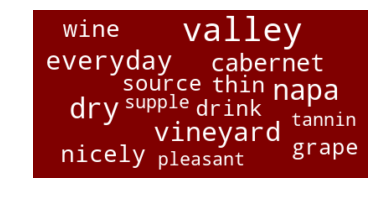

<Figure size 432x288 with 0 Axes>

Topic #2: 
+wrap          +mark          +show          +mint          +bordeaux      
+keep          +wine          +tannin        +spice         +especially    
+cherry        +napa          +know          +valley        +acidity       



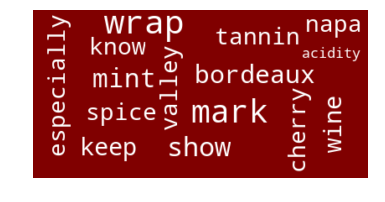

<Figure size 432x288 with 0 Axes>

Topic #3: 
+go            +frame         +bottle        +soften        +produce       
+case          +may           +wine          +sour          +production    
+mountain      +time          +vintage       +graphite      +develop       



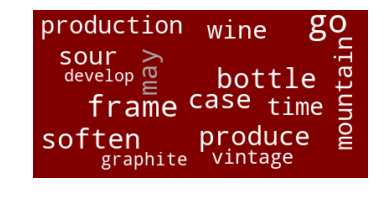

<Figure size 432x288 with 0 Axes>

Topic #4: 
+acid          +fruit         +finish        +wine          +note          
+somewhat      +tannin        +dry           +wood          +hot           
+black         +cherry        +raisin        +violet        +ageability    



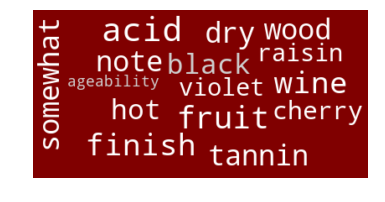

<Figure size 432x288 with 0 Axes>

Topic #5: 
+body          +full          +palate        +wine          +black         
+red           +finish        +plum          +merlot        +fruit         
+verdot        +blend         +nose          +petit         +medium        



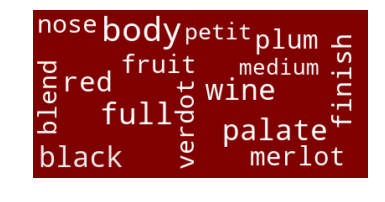

<Figure size 432x288 with 0 Axes>

Topic #6: 
+nice          +dry           +currant       +cab           +cabernet      
+simple        +tough         +show          +hold          +good          
+balance       +price         +style         +wine          +tannin        



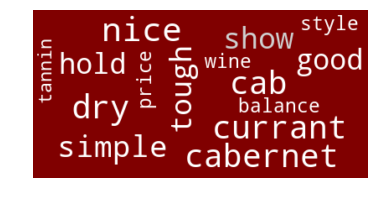

<Figure size 432x288 with 0 Axes>

Topic #7: 
+hard          +year          +young         +give          +age           
+cellar        +currant       +tannic        +decant        +tannin        
+wine          +black         +core          +want          +try           



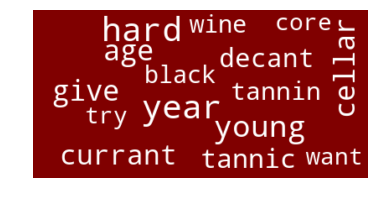

<Figure size 432x288 with 0 Axes>

Topic #8: 
+oak           +rich          +ripe          +chocolate     +sweet         
+cabernet      +smoky         +drink         +year          +next          
+currant       +new           +soft          +cherry        +mouth         



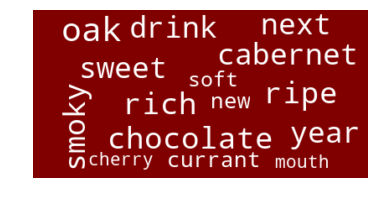

<Figure size 432x288 with 0 Axes>

Topic #9: 
+sweet         +cherry        +like          +jammy         +almost        
+taste         +easy          +raspberry     +soft          +drinking      
+oak           +fruit         +green         +drinkable     +ripe          



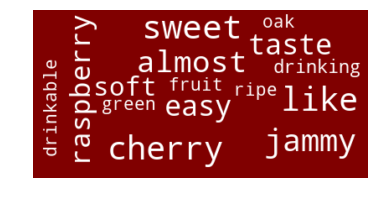

<Figure size 432x288 with 0 Axes>

In [5]:
print("\nConstructing Term/Frequency Matrix using TF-IDF")
# Default for norm is 'l2', use norm=None to supress
tfidf_vect = TfidfTransformer(norm=None, use_idf=True) #set norm=None
# tf matrix is (n_reviews)x(m_terms)
tf = tfidf_vect.fit_transform(tf)
# Display the terms with the largest TFIDF value
term_idf_sums = tf.sum(axis=0)
term_idf_scores = []
for i in range(len(terms)):
    term_idf_scores.append([terms[i], term_idf_sums[0,i]])
print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
tf.shape[1], " columns.")
print("The Term list has", len(terms), " terms.")
term_idf_scores.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest TF-IDF Scores:")
for i in range(10):
    j = i
    print('{:<15s}{:>8.2f}'.format(term_idf_scores[j][0], term_idf_scores[j][1]))
uv = LatentDirichletAllocation(n_components=n_topics, max_iter=max_iter,\
learning_method=learning_method, \
learning_offset=learning_offset, \
random_state=12345)
U = uv.fit_transform(tf)
print("\n********** GENERATED TOPICS **********")
TextAnalytics.display_topics(uv.components_, terms, n_terms=15, word_cloud=True, mask=None)


Storing topic selection for each doc in topics[]

In [6]:
topics = [0] * n_reviews
for i in range(n_reviews):
    max = abs(U[i][0])
    topics[i] = 0
    for j in range(n_topics):
        x = abs(U[i][j])
        if x > max:
            max = x
            topics[i] = j
#*** Store Topic Scores in rev_score ***
rev_scores = []
for i in range(n_reviews):
    u = [0] * (n_topics+1)
    u[0] = topics[i]
    for j in range(n_topics):
        u[j+1] = U[i][j]
    rev_scores.append(u)


1. Setting up review topics in new pandas dataframe 'df_rev'
2. Examining Topic Assignment Versus Points & Price

In [7]:
cols = ["topic"]
for i in range(n_topics):
    s = "T"+str(i+1)
    cols.append(s)
df_rev = pd.DataFrame.from_records(rev_scores, columns=cols)
df = df.join(df_rev)

# Data Map for these Reviews
attribute_map = {
'Review':[3,(1, 14000),[0,0]],
'description':[3,(''),[0,0]],
'year':[3,(1900,2020),[0,0]],
'points':[0,(1, 100),[0,0]],
'price':[0,(1, 3000),[0,0]],
'winery':[3,(''),[0,0]],
'Region':[2,('South Coast', 'Sonoma', 'Sierra Foothills', \
'Redwood Valley', 'Red Hills Lake County', \
'Potter Valley', 'North Coast', 'Napa-Sonoma', \
'Napa', 'Mendocino/Lake Counties', \
'Mendocino Ridge', 'Mendocino County', \
'Mendocino', 'Lake County', 'High Valley', \
'Clear Lake', 'Central Valley', 'Central Coast',\
'California Other'),[0,0]],
'topic':[2,(0,1,2,3,4,5,6,7,8),[0,0]],
'T1':[0,(-1e+8,1e+8),[0,0]],
'T2':[0,(-1e+8,1e+8),[0,0]],
'T3':[0,(-1e+8,1e+8),[0,0]],
'T4':[0,(-1e+8,1e+8),[0,0]],
'T5':[0,(-1e+8,1e+8),[0,0]],
'T6':[0,(-1e+8,1e+8),[0,0]],
'T7':[0,(-1e+8,1e+8),[0,0]],
'T8':[0,(-1e+8,1e+8),[0,0]],
'T9':[0,(-1e+8,1e+8),[0,0]]}
    
print("****** Examining Topic Assignment Versus Points & Price *****")
n_regions = 19
avg_points = [0] * n_topics
avg_price = [0] * n_topics
t_counts = [0] * n_topics
# region is a dictionary of lists by region
# Each list has 4 values: sum_points, npoints, sum_price, nprice
region = {}

for r in attribute_map['Region'][1]:
    region[r] = [0, 0, 0, 0]
for i in range(n_reviews):
    j = int(df['topic'].iloc[i])
    t_counts[j] += 1
    avg_points[j] += df['points'].iloc[i]
    region[df['Region'].iloc[i]][0] += df['points'].iloc[i]
    region[df['Region'].iloc[i]][1] += 1
    if pd.isnull(df['price'].iloc[i])==True:
        continue
    avg_price [j] += df['price' ].iloc[i]
    region[df['Region'].iloc[i]][2] += df['price'].iloc[i]
    region[df['Region'].iloc[i]][3] += 1
print('{:<6s}{:>7s}{:>8s}{:>8s}'.format("TOPIC", "N", "POINTS", "PRICE"))
for i in range(n_topics):
    if t_counts[i]>0:
        avg_points[i] = avg_points[i]/t_counts[i]
        avg_price [i] = avg_price [i]/t_counts[i]
    print('{:>3d}{:>10d}{:>8.2f}{:>8.2f}'.format((i+1), t_counts[i],avg_points[i], avg_price[i]))
print("")


****** Examining Topic Assignment Versus Points & Price *****
TOPIC       N  POINTS   PRICE
  1      1090   88.78   51.59
  2       862   89.24   50.58
  3       644   89.42   66.30
  4      1145   87.41   53.75
  5      2480   89.28   60.24
  6      1607   89.00   50.94
  7      1493   89.46   62.92
  8      2301   89.46   57.00
  9      1513   86.09   42.01

